# Linear Regression model with Gas Consumption Data

- we make linear regression model with Busan city's gas consumption and average tempurature from 2009-01 to 2018-05.
- we will predict Busan city's gas consumption from 2018_06 to 2019-05 by linear regression model.

### 1) import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

### 2) load datasets

In [3]:
# y_train : BUSAN_gas_consumption from 2009-01 to 2018-05 (113 months)
# temp_train_orig : BUSAN_average_tempurature from 2009-01 to 2018_12
# temp_test_orig : BUSAN_average_tempurature from 2018-01 to 2019_12

test = pd.read_csv("test.csv", encoding="utf-8", index_col=0)
temp_train_orig = pd.read_csv("ta_20200329144537.csv", encoding = "cp949" , skiprows =7, usecols = ['평균기온(℃)'])
temp_test_orig = pd.read_csv("ta_20200329180212.csv" , encoding = "cp949" , skiprows = 7 , usecols = ['평균기온(℃)'])

y_train = test.values[:,:]
sample_submission = pd.read_csv("sample_submission.csv", encoding="utf-8", index_col=0)

### 3) Explore datasets

In [39]:
# temp_train : indexing tempurature from 2009-01 to 2018-05 (113 months)
# temp_train : indexing tempurature from 2018_06 to 2019-05 (113 months)
temp_train = temp_train_orig.values[:-7,:].T
temp_test = temp_test_orig.values[5:-7].T
temp_train1 = np.repeat(temp_train,10000,axis=0)
temp_train1.shape

(10000, 113)

In [40]:
# explore datasets
print("Shape of y_train :" ,y_train.shape)
print("Shape of temp_train :", temp_train.shape)
print("Shape of temp_test :", temp_test.shape)
print("Type of y_train :" , type(y_train))
print("Type of temp_train :" , type(temp_train))
print("Type of temp_test :" , type(temp_test))

Shape of y_train : (10000, 113)
Shape of temp_train : (1, 113)
Shape of temp_test : (1, 12)
Type of y_train : <class 'numpy.ndarray'>
Type of temp_train : <class 'numpy.ndarray'>
Type of temp_test : <class 'numpy.ndarray'>


In [78]:
W = np.random.randn(10000,1)*0.01
b = np.zeros((10000,1))

In [130]:
def propagate(W, b, X, Y):

    m = (Y.shape[0]) * (Y.shape[1])

    Z = np.dot(W, X)+ b
    
    cost = mean_squared_error(Y, Z) ** 0.5
    
    # Backward propagation
    dW = (1/m) * (np.dot(X,(Z-Y).T)).T
    db = (1/m) * (np.sum(Z-Y))
    
    grads = {"dW": dW,
             "db": db}
    
    return grads, cost

In [135]:
def optimize(W, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    Optimizes W and b by running a Gradient descent
    Input : 
        num_iterations : number of iterations of the optimization loop
        learning_rate -- learning rate of the gradient descent
        print_cost -- True to print the loss every 50 steps
   Returns:
       params -- dictionary containing the weights W and bias b
       grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
       costs -- list of all the costs computed during the optimization -> used to plot
    """
    costs = []
    
    for i in range(num_iterations):

        grads, cost = propagate(W,b,X,Y)

        dW = grads["dW"]
        db = grads["db"]
        
        W = W - (learning_rate) * dW
        b = b - (learning_rate) * db

        # Record the costs for plotting
        if i % 10 == 0:
            costs.append(cost)
            
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per 100)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    # Lets save the trainded parameters in a variable
    params = {"W": W,
              "b": b}    
    grads = {"dW": dW,
             "db": db}
    
    return params, grads, costs

Cost after iteration 0: 53.647574
Cost after iteration 100: 30.307256
Cost after iteration 200: 29.479180
Cost after iteration 300: 29.398899
Cost after iteration 400: 29.391222
Cost after iteration 500: 29.390488
Cost after iteration 600: 29.390418
Cost after iteration 700: 29.390412
Cost after iteration 800: 29.390411
Cost after iteration 900: 29.390411


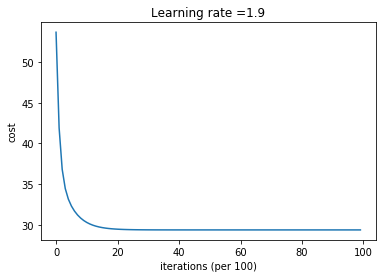

In [159]:
params, grads, costs = optimize(W, b, temp_train, y_train, num_iterations= 1000, learning_rate = 1.9, print_cost = True)

In [162]:
W1 = params["W"]
b1 = params["b"]

In [163]:
Y_hat = np.dot(W1,temp_train) + b1

In [164]:
RMSE = mean_squared_error(y_train, Y_hat) ** 0.5
print("RMSE :" , RMSE)

RMSE : 29.39041080451973
